In [78]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    sys.path.append(module_path+'/data')

In [86]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy import stats
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from codes.preprocess import *
import numpy as np

In [87]:
from codes.preprocess import *
X_train, y_train = load_clean_data('train')
X_test, y_test = load_clean_data('test')

In [88]:
categ_cols = X_train.columns[X_train.dtypes==object].tolist()
numeric_cols = X_train.columns[X_train.dtypes!=object].tolist()
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('categor', categorical_transformer, categ_cols)
    ]
)

In [84]:
def CM(pipe, X, y):
    delinq_cm = ConfusionMatrix(pipe,
                                classes=['Current', 'Delinquent'],
                                label_encoder={0: 'Current', 1: 'Delinquent'},
                                is_fitted=True, percent=True
                                )
    delinq_cm.score(X, y)
    delinq_cm.show()
    print(delinq_cm.confusion_matrix_)
    print(classification_report(y, pipe.predict(X), target_names=['Current', 'Delinquent'], digits=4))

In [89]:
pipe = Pipeline([
     ('prep', preprocessor),
     ('estm', GradientBoostingClassifier(n_estimators=1000,max_features=4,max_depth=100,random_state=42))
]) 

In [ ]:
pipe.fit(X_train, y_train)

In [10]:

param_grid = dict(estm =[SVC(gamma = 'auto'), LogisticRegression(solver = 'lbfgs',max_iter =1000)],
                  estm__C=[0.1, 10, 100])

#distributions = dict(C=uniform(loc=0, scale=4))
logistic_reg = RandomizedSearchCV(pipe, param_grid, random_state=42)


pipe.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['id', 'org_balance',
                                                   'interest_rate', 'ltv',
                                              

In [23]:
from codes.preprocess import *
X_test, y_test = load_clean_data('test')

In [24]:
#Combine the train and test datasets
Final_df_X = pd.concat([X_train,X_test], ignore_index =True)

In [25]:
Final_df_Y = pd.concat([y_train,y_test], ignore_index =True)

In [26]:
Final_df = pd.concat([Final_df_X,Final_df_Y],axis=1)

In [27]:
Final_df.head()

,org_balance,interest_rate,ltv,borrower_count,score,loan_purpose,dti,occupancy_type,property_type,upc_balance,loan_age,months_to_maturity,payment_amounts,delinquency_bool
0,64000,5.250,47,2,728.0,C,30.0,I,SF,62412.40,12,348,163.49,0
1,408000,4.250,80,2,750.5,P,33.0,P,SF,402288.47,10,350,580.28,0
2,105000,4.250,75,1,809.0,R,29.0,P,PU,88885.01,16,164,1469.89,0
3,388000,3.875,80,1,776.0,P,42.0,P,SF,376818.06,19,341,605.76,0
4,179000,4.750,85,1,761.0,P,39.0,P,CO,175510.00,13,347,-0.00,0


In [58]:
Final_df.shape

(1608153, 14)

In [70]:
Final_df[Final_df_Y==1].payment_amounts.mean()

254.8714459022879

In [93]:
Final_df[Final_df_Y==1].loan_age.max()

28

In [94]:
Final_df[Final_df_Y==0].loan_age.max()

81

In [11]:
 #(x ='score',y="delinquent_bool",data=X_test)
    
sns.set(style="white")
sns.set_palette('dark')

def ax_params(xlabel, ylabel, plt_title=None, ax=None, legend_title=None, c='k', savefig=False):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.title(plt_title)
    if legend_title:
        plt.legend(title=legend_title)
    if ax is None:
        ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color(c)
    ax.spines['bottom'].set_color(c)
    if savefig:
        plt.gcf().savefig(f'{plt_title}.png',bbox_inches='tight')
def distplot(column):
    sns.distplot(Final_df_X[column][Final_df_Y==0], color = '#1a9988', label='Current',  bins =10, kde =False, norm_hist =True)
    sns.distplot(Final_df_X[column][Final_df_Y==1], color= '#eb5600', label ='Delinquent', bins =10, kde =False, norm_hist =True)

In [12]:
Features = {'score':'Borrower Credit Score', 
            'interest_rate': 'Interest rate', 
            'ltv': 'Loan to Value',
            'loan_age': 'Loan Age',
            'dti': 'Debt to Income ratio',
            'upc_balance' : 'Unpaid balance amount',
            'loan_purpose': 'Loan purpose',
            'org_balance' : 'Original Balance',
            'borrower_count': 'Borrower Count',
            'occupancy_type' : 'Occupancy Type',
            'months_to_maturity': 'Months to Maturity',
            'payment_amounts' : 'Payment Amounts'
           }

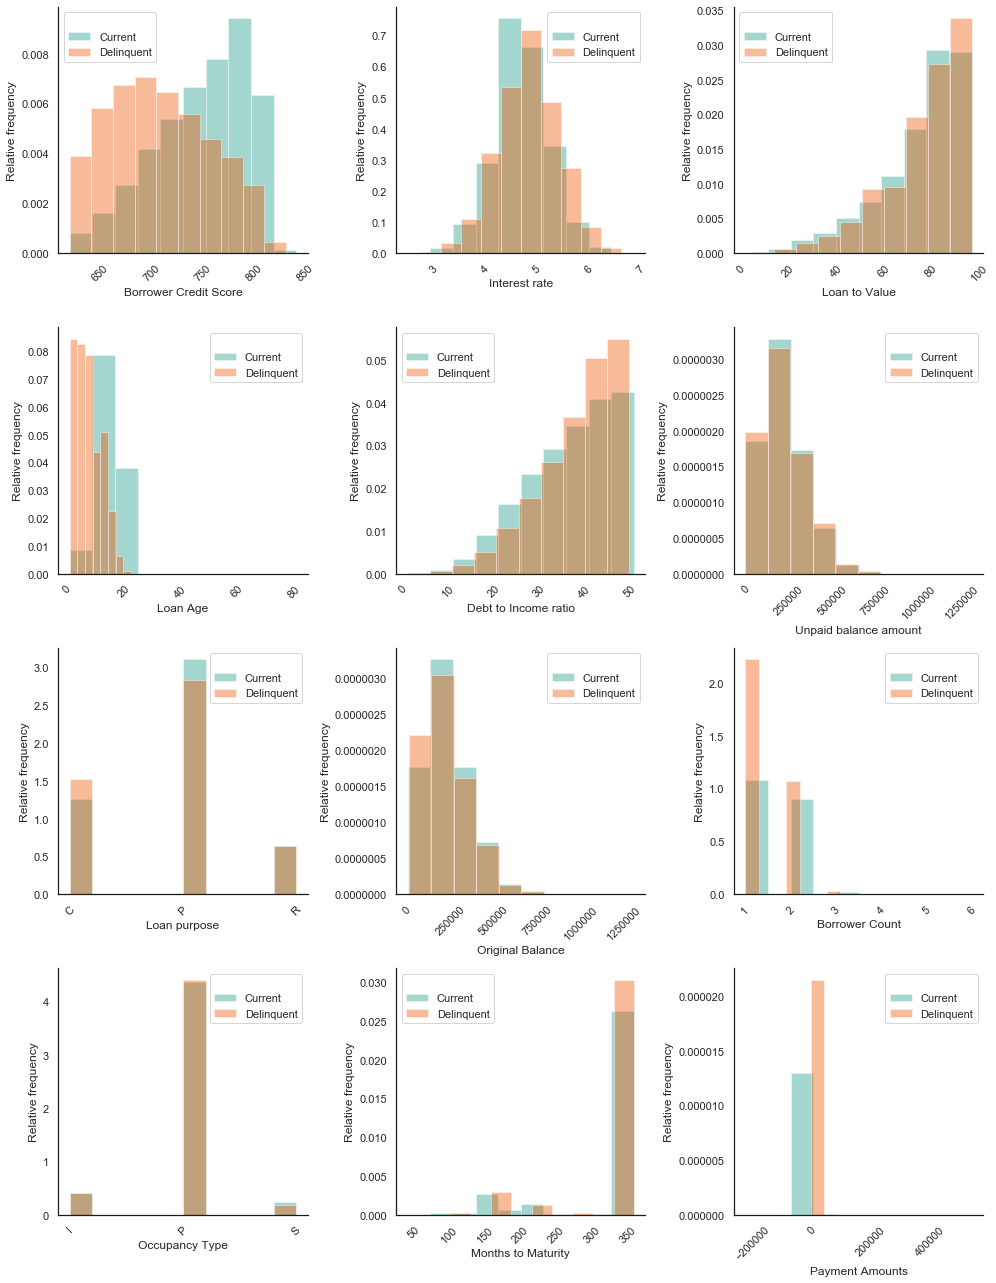

In [14]:
fig = plt.figure(figsize=(14,18))
axes = []
for i,col in enumerate(Features.keys()):
    ax = fig.add_subplot(4,3,i+1)
    distplot(col)
    ax_params(Features[col], 'Relative frequency', legend_title=" ")
plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(14,18))

sns.scatterplot(x='d', y= 'upc_balance', color = '#1a9988', data =Final_df)

In [36]:
df = pd.concat([X_train,y_train],axis=1)
df = pd.concat([df[df.delinquency_bool==1],df[df.delinquency_bool==0].sample(n=y_train.sum(), random_state=42)],axis=0)
X_train = df.drop(columns=['delinquency_bool'])
y_train = df.delinquency_bool

In [37]:
pipe = Pipeline([
     ('prep', preprocessor),
     ('clf', GradientBoostingClassifier())
])

In [48]:
param_grid = dict(clf=[RandomForestClassifier(n_jobs=-2, random_state=42)],
         clf__n_estimators=[10, 100, 1000],
         clf__max_depth=[5,10,50], #
         clf__max_features=[4,8,12,16],
        )

In [39]:
y_train.value_counts()

1    40648
0    40648
Name: delinquency_bool, dtype: int64

In [42]:
rand_cv = RandomizedSearchCV(pipe, param_grid,  scoring='accuracy', n_iter=10, n_jobs=-2, cv=5, random_state=2020)
rand_cv.fit(X_train, y_train)

/Users/vyju/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('prep',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numeric',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('scaler',
                                                                                                StandardScaler(copy=True,
                                                                                   

In [43]:
rand_cv.best_params_

{'clf__n_estimators': 1000,
 'clf__max_features': 4,
 'clf__max_depth': 50,
 'clf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=50, max_features=4, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=1000,
                        n_jobs=-2, oob_score=False, random_state=42, verbose=0,
                        warm_start=False)}

In [ ]:

fig = plt.figure(figsize=(4,4))

sns.barplot(x='delinquency_bool', y= 'score', color = '#1a9988', data =Final_df)

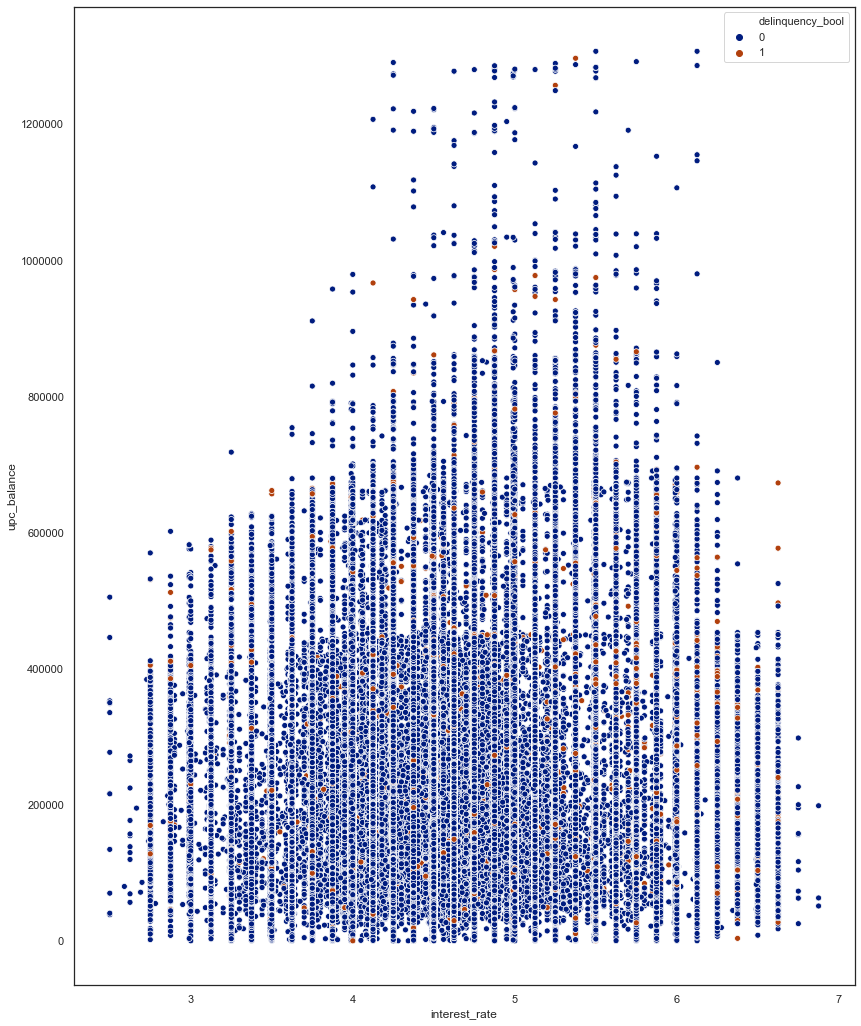

In [51]:
fig = plt.figure(figsize=(14,18))

sns.scatterplot(x='interest_rate', y= 'upc_balance', color = '#1a9988', hue = 'delinquency_bool', data =Final_df)

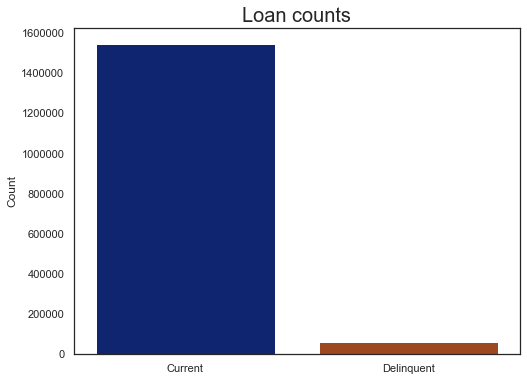

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(Final_df["delinquency_bool"])
plt.xticks((0, 1), ["Current", "Delinquent"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Loan counts", y=1, fontdict={"fontsize": 20});

In [ ]:
fig = plt.figure(figsize=(8,6))
for b,h,t in [(0,'#1a9988','Current'),(1,'#eb5600','Delinquent')]:
    sns.regplot(x='ltv',y='org_balance', 
            data=Final_df[Final_df.delinquency_bool==b], 
            label = t,x_bins = [10,20,30,40,50,60,70,80,90,100],
            color=h, x_estimator=np.mean, scatter_kws={'alpha':0.8})
ax_params(xlabel='Loan to Value', ylabel='Origination Amount',
          plt_title="figures/LTV_vs_Origination_Amount", legend_title='Mortgage',savefig=True)

In [ ]:
fig = plt.figure(figsize=(4,4))

sns.barplot(x= , y= 'score', color = '#1a9988', data =Final_df)

In [ ]:
fig = plt.figure(figsize=(8,6))
for b,h,t in [(0,'#1a9988','Current'),(1,'#eb5600','Delinquent')]:
    sns.regplot(x='ltv',y='org_balance', 
            data=Final_df[Final_df.delinquency_bool==b], 
            label = t,x_bins = [10,20,30,40,50,60,70,80,90,100],
            color=h, x_estimator=np.mean, scatter_kws={'alpha':0.8})
ax_params(xlabel='Loan to Value', ylabel='Origination Amount',
          plt_title="figures/LTV_vs_Origination_Amount", legend_title='Mortgage',savefig=True)